## MNIST Dataset
The MNIST dataset is a classic benchmark in machine learning, often called the “hello world” of classification. It consists of 70,000 images of handwritten digits (0–9) written by high school students and US Census Bureau employees.

Each image:

 . Is grayscale and sized 28×28 pixels
 . Is flattened into a 784-dimensional vector
 . Has a label from 0 to 9

## Step 1: Importing Required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score, roc_curve, precision_score, recall_score,precision_recall_curve


 ## Step 2: Loading the MNIST Dataset

In [2]:
#Data fetching from open ml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(np.uint8)

print(" MNIST Loaded! Shape of X:", X.shape, "Shape of y:", y.shape)
#shuffling the data set for more enhanced data prediction
shuffle_idx = np.random.permutation(len(X))
X, y = X[shuffle_idx], y[shuffle_idx]



 MNIST Loaded! Shape of X: (70000, 784) Shape of y: (70000,)


## Visualize Some Sample Digits

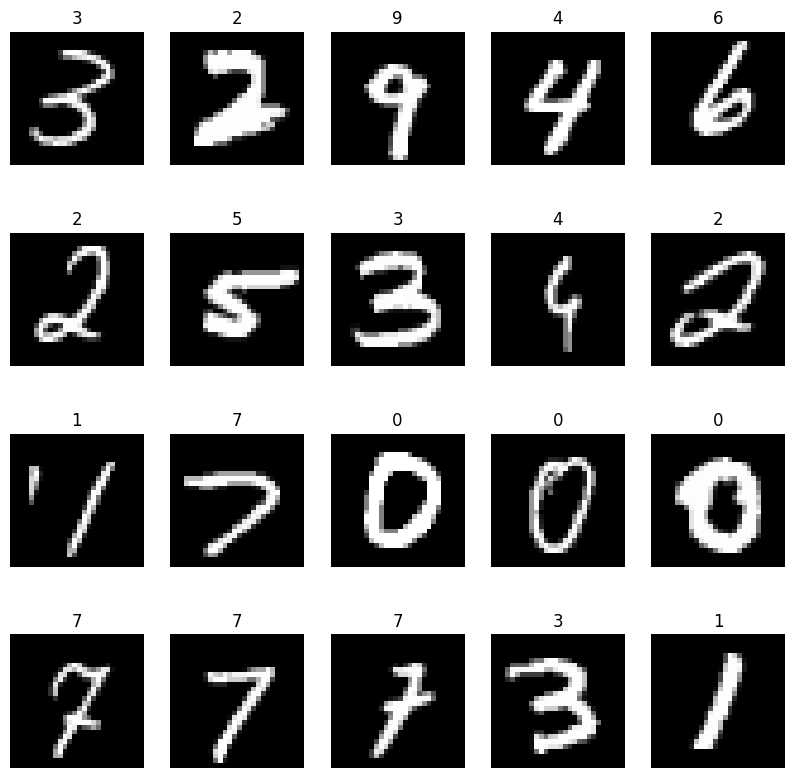

In [3]:

def plot_images(images, labels):
    n_cols = min(5, len(images))
    n_rows = (len(images) + n_cols - 1) // n_cols
    fig = plt.figure(figsize=(10, 10))

    for i in range(len(images)):
        sp = fig.add_subplot(n_rows, n_cols, i+1)
        plt.axis("off")
        plt.imshow(images[i], cmap=plt.cm.gray)
        sp.set_title(labels[i])

    plt.show()

p = np.random.permutation(len(X))[:20]
plot_images(X[p].reshape(-1, 28, 28), y[p])


 ## Step 3: Split the Dataset

## Test-Train Split
First 60,000 samples → training set
Last 10,000 samples → test set
Already shuffled to support fair cross-validation and better learning stability

In [4]:
# Convert y to integer labels
y = y.astype(np.uint8)

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)
print('Data splitting completed')
from sklearn.preprocessing import StandardScaler
# Step 4: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))


Data splitting completed


## Step 4: Train Classifiers

SGD Classifier(using hinge loss)

In [5]:
sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train_scaled, y_train)


SGDClassifier(random_state=42)

Random Forest Classifier

In [6]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
import joblib

# Save both models and scaler
joblib.dump(sgd_clf, "mnist_sgd_model.pkl")
joblib.dump(rf_clf, "mnist_rf_model.pkl")
joblib.dump(scaler, "mnist_scaler.pkl")

print(" Model and scaler saved.")


 Model and scaler saved.


## Step 5: Evaluate the Models (Confusion matrices)

SGD Classifier Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       986
           1       0.97      0.97      0.97      1125
           2       0.93      0.89      0.91       999
           3       0.93      0.85      0.89      1020
           4       0.93      0.90      0.92       975
           5       0.90      0.82      0.86       902
           6       0.95      0.95      0.95       982
           7       0.95      0.90      0.92      1042
           8       0.66      0.93      0.77       975
           9       0.89      0.85      0.87       994

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



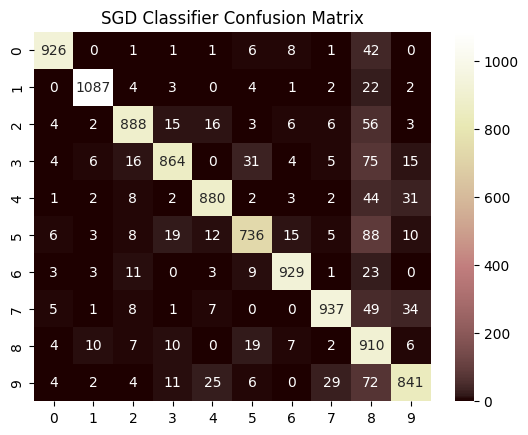

In [8]:
y_pred_sgd = sgd_clf.predict(X_test_scaled)
print("SGD Classifier Report:\n", classification_report(y_test, y_pred_sgd))
sns.heatmap(confusion_matrix(y_test, y_pred_sgd), annot=True, fmt="d", cmap="pink")
plt.title("SGD Classifier Confusion Matrix")
plt.show()



Random Forest Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       986
           1       0.98      0.99      0.99      1125
           2       0.97      0.97      0.97       999
           3       0.96      0.95      0.95      1020
           4       0.96      0.97      0.97       975
           5       0.97      0.95      0.96       902
           6       0.98      0.99      0.98       982
           7       0.98      0.97      0.97      1042
           8       0.95      0.96      0.95       975
           9       0.95      0.93      0.94       994

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



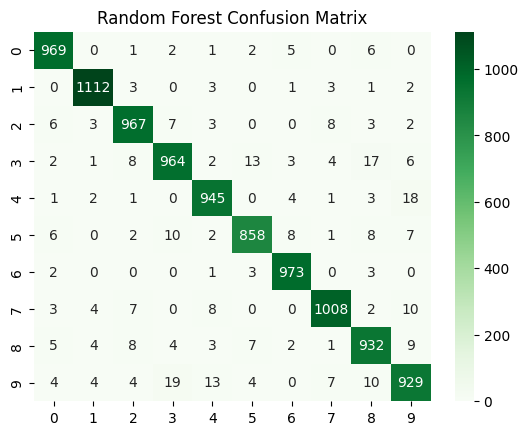

In [9]:
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()


 ## Step 6: Evaluation Metrics (Multiclass)

In [10]:
y_pred_sgd = sgd_clf.predict(X_test_scaled)
y_pred_rf = rf_clf.predict(X_test)


SGD Classifier

In [11]:
y_pred_sgd = sgd_clf.predict(X_test_scaled)
y_pred_rf = rf_clf.predict(X_test)

print("\n--- SGD Classifier ---")
print(confusion_matrix(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_sgd))
print("F1 Score:", f1_score(y_test, y_pred_sgd, average='weighted'))

# Additional: Precision and Recall (for multiclass use average='weighted')
print("Precision:", precision_score(y_test, y_pred_sgd, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_sgd, average='weighted'))


--- SGD Classifier ---
[[ 926    0    1    1    1    6    8    1   42    0]
 [   0 1087    4    3    0    4    1    2   22    2]
 [   4    2  888   15   16    3    6    6   56    3]
 [   4    6   16  864    0   31    4    5   75   15]
 [   1    2    8    2  880    2    3    2   44   31]
 [   6    3    8   19   12  736   15    5   88   10]
 [   3    3   11    0    3    9  929    1   23    0]
 [   5    1    8    1    7    0    0  937   49   34]
 [   4   10    7   10    0   19    7    2  910    6]
 [   4    2    4   11   25    6    0   29   72  841]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       986
           1       0.97      0.97      0.97      1125
           2       0.93      0.89      0.91       999
           3       0.93      0.85      0.89      1020
           4       0.93      0.90      0.92       975
           5       0.90      0.82      0.86       902
           6       0.95      0.95      0.95       982
           7

Random Forest Classifier

In [12]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))

[[ 969    0    1    2    1    2    5    0    6    0]
 [   0 1112    3    0    3    0    1    3    1    2]
 [   6    3  967    7    3    0    0    8    3    2]
 [   2    1    8  964    2   13    3    4   17    6]
 [   1    2    1    0  945    0    4    1    3   18]
 [   6    0    2   10    2  858    8    1    8    7]
 [   2    0    0    0    1    3  973    0    3    0]
 [   3    4    7    0    8    0    0 1008    2   10]
 [   5    4    8    4    3    7    2    1  932    9]
 [   4    4    4   19   13    4    0    7   10  929]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       986
           1       0.98      0.99      0.99      1125
           2       0.97      0.97      0.97       999
           3       0.96      0.95      0.95      1020
           4       0.96      0.97      0.97       975
           5       0.97      0.95      0.96       902
           6       0.98      0.99      0.98       982
           7       0.98      0.97   

## Step 7 :Precision and Recall vs Threshold Plot (For SGD)

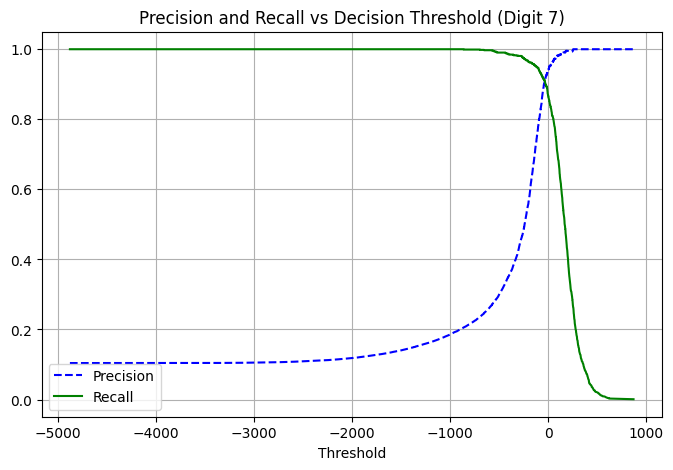

In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Train binary classifier for digit 7
sgd_clf_for_7 = SGDClassifier(random_state=42)
sgd_clf_for_7.fit(X_train_scaled, (y_train == 7).astype(int))

# Prepare test labels and scores
y_test_7 = (y_test == 7).astype(int)
y_scores_7 = sgd_clf_for_7.decision_function(X_test_scaled)

# Compute precision, recall
precisions, recalls, thresholds = precision_recall_curve(y_test_7, y_scores_7)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)
plt.title("Precision and Recall vs Decision Threshold (Digit 7)")
plt.show()


## Compute FPR, TPR, and thresholds for the ROC curve

To draw the ROC curve, we calculate the True Positive Rate (TPR) and False Positive Rate (FPR) at different thresholds.

----TPR (Recall): out of all actual 7s, how many were correctly classified as 7.
----FPR: out of all non-7s, how many were wrongly predicted as 7.


ROC Curve for Digit '7'

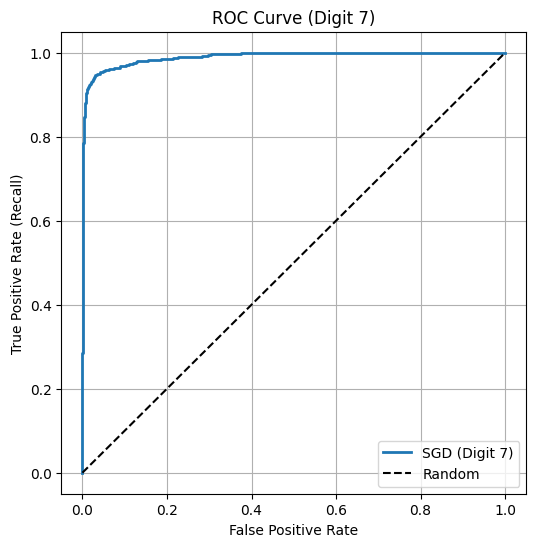

In [14]:
fpr, tpr, roc_thresholds = roc_curve(y_test_7, y_scores_7)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, linewidth=2, label="SGD (Digit 7)")
plt.plot([0, 1], [0, 1], 'k--', label="Random")  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve (Digit 7)")
plt.grid(True)
plt.legend()
plt.show()


## Step 7: Visualize Worst Misclassifications

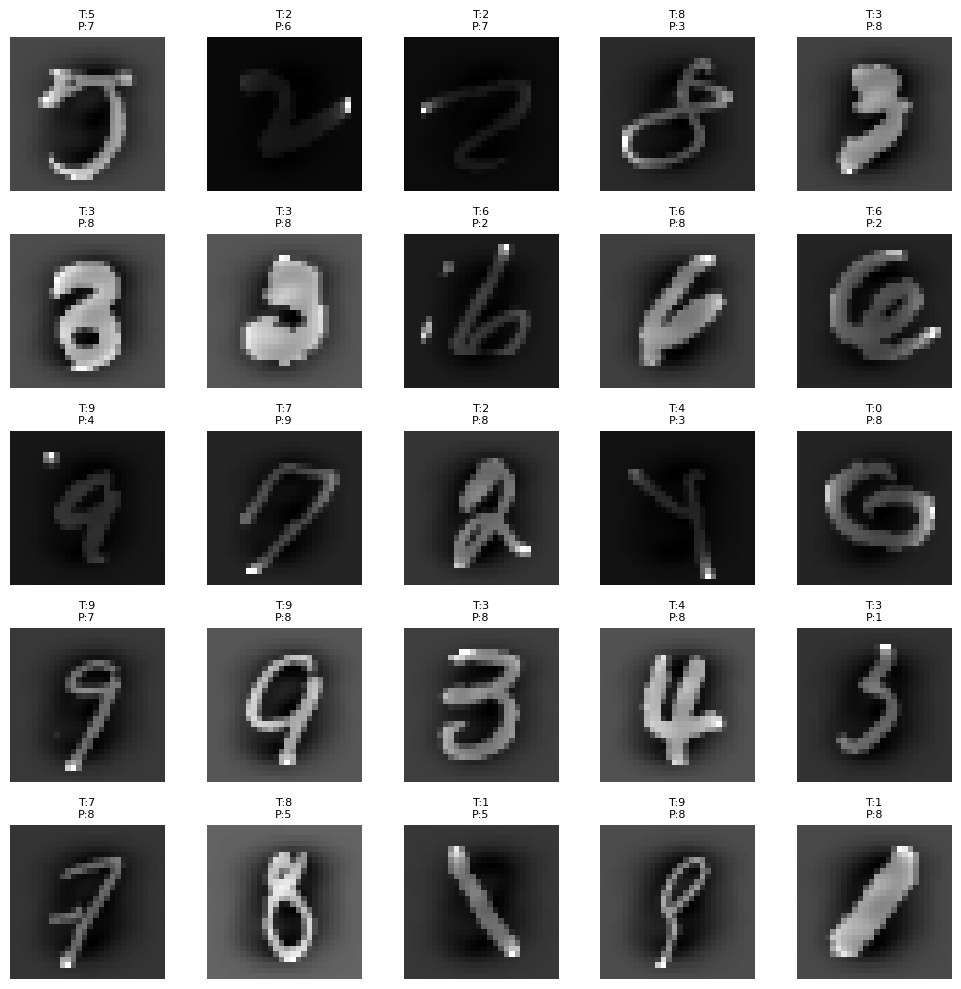

In [15]:
def plot_misclassifications(model, X_test, y_test):
    y_pred = model.predict(X_test)
    misclassified_idx = np.where(y_pred != y_test)[0]
    worst = misclassified_idx[:25]

    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(worst):
        plt.subplot(5, 5, i + 1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap="gray")
        plt.title(f"T:{y_test[idx]}\nP:{y_pred[idx]}", fontsize=8)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_misclassifications(sgd_clf, X_test_scaled, y_test)


##  Error Analysis: Identifying Top Confused Digit Pairs

In [16]:
from sklearn.metrics import confusion_matrix

y_pred = sgd_clf.predict(X_test_scaled)
conf_mat = confusion_matrix(y_test, y_pred)
np.fill_diagonal(conf_mat, 0)

# Top 3 most confused digit pairs
confused_pairs = np.dstack(np.unravel_index(np.argsort(conf_mat.ravel())[-3:], conf_mat.shape))[0]

print("Top 3 confusion pairs:")
for i, j in reversed(confused_pairs):
    print(f"{i} misclassified as {j}: {conf_mat[i, j]} times")


Top 3 confusion pairs:
5 misclassified as 8: 88 times
3 misclassified as 8: 75 times
9 misclassified as 8: 72 times


##  Visualization of Most Frequent Misclassifications: 5 ↔ 8

Based on the confusion matrix, the most frequent error made by the SGD classifier was confusing digit 5 with 8, occurring more than 100 times. Below, we visualize these misclassifications to understand the visual similarities leading to these errors.

Misclassified 5s as 8s:


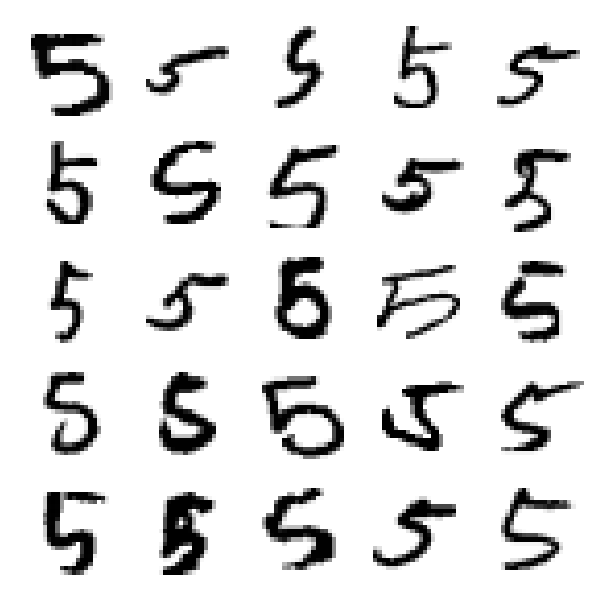

In [18]:
# Identifying where label is 5 but predicted as 8
y_pred_sgd = sgd_clf.predict(X_test_scaled)

X_5_as_8 = X_test[(y_test == 5) & (y_pred_sgd == 8)]

def plot_digits(instances, images_per_row=5):
    size = 28  # MNIST images are 28x28
    images_per_row = min(len(instances), images_per_row)
    
    if images_per_row == 0:
        print("ops!..No images to display")
        return

    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    big_image = np.vstack([np.hstack(row) for row in image_grid])
    
    plt.figure(figsize=(1.5 * images_per_row, 1.5 * n_rows))
    plt.imshow(big_image, cmap="binary")
    plt.axis("off")
    plt.show()

# Plot the misclassified digits
if len(X_5_as_8) == 0:
    print("No 5s misclassified as 8s.")
else:
    print("Misclassified 5s as 8s:")
    plot_digits(X_5_as_8[:25])


## Step 9: Gradio Web App

In [19]:
import gradio as gr
import numpy as np
import cv2
import joblib

# ===== Load Pretrained Models =====
sgd_clf = joblib.load("mnist_sgd_model.pkl")
rf_clf = joblib.load("mnist_rf_model.pkl")
scaler = joblib.load("mnist_scaler.pkl")

# ===== Prediction Function =====
def predict_digit(img):
    # Convert to grayscale, resize to 28x28
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    
    # Invert colors if needed
    if np.mean(img) > 127:
        img = 255 - img

    # Flatten and scale
    img = img.reshape(1, -1).astype(np.float64)
    img_scaled = scaler.transform(img)

    # SGD Prediction
    sgd_pred = sgd_clf.predict(img_scaled)[0]

    # RF Prediction with probabilities
    rf_probs = rf_clf.predict_proba(img_scaled)[0]
    rf_top3_indices = np.argsort(rf_probs)[-3:][::-1]
    rf_top3 = {str(i): f"{rf_probs[i] * 100:.2f}%" for i in rf_top3_indices}

    return {
        "SGD Prediction": str(sgd_pred),
        "RF Top 3 predictions are ": rf_top3
    }

# ===== Gradio UI =====
interface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(type="numpy", image_mode="RGB", label="Upload or Draw a Digit"),
    outputs=gr.JSON(label="Prediction Results"),
    title="MNIST Digit Classifier",
    description="Upload or draw a digit (0-9) to see the prediction with probabilities."
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
